In [1]:
from torchmdnet.datasets import MD17

md17_data = MD17('/share/project/sharefs-skfeng/MD17', dataset_arg='aspirin')

HTTPError: HTTP Error 404: Not Found

In [2]:
len(md17_data)

211762

In [3]:
from rdkit import Chem
'CC(=O)OC1=CC=CC=C1C(=O)O'
# md17_data[1000].z
mol=Chem.AddHs(Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O'))
for i, a in enumerate(mol.GetAtoms()):
    # print(a.GetAtomicNum())
    a.SetAtomMapNum(i)

In [4]:
import numpy as np
path = '/share/project/sharefs-skfeng/MD17/raw/aspirin_dft.npz'
data_npz = np.load(path)

In [5]:
list(data_npz.keys())

['E', 'name', 'F', 'theory', 'R', 'z', 'type', 'md5']

In [6]:
data_npz['R'].shape

(211762, 21, 3)

In [1]:

npy_file = '/share/project/sharefs-skfeng/xyz2mol/aspirin_4w.npy'
import numpy as np
asp_4w = np.load(npy_file,allow_pickle=True)
# with open(xyz_file, 'r') as xyz_read:


In [2]:
import copy
mol = copy.deepcopy(asp_4w[0])
show_num = 200
for i in range(show_num):
    i += 1
    conf = asp_4w[i].GetConformer()
    conf.SetId(i)
    mol.AddConformer(conf)

In [3]:
from ipywidgets import interact, interactive, fixed
import py3Dmol
from rdkit import Chem
def drawit(m,p,confId):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    return p.show()
viewer = py3Dmol.view(width=500, height=500)
mb = Chem.MolToMolBlock(mol,confId=0)
viewer.addModel(mb,'sdf')
viewer.setStyle({'stick':{}})
viewer.zoomTo()
conformerIds=[conf.GetId() for conf in mol.GetConformers()]
interact(drawit, m=fixed(mol),p=fixed(viewer),confId=(0,mol.GetNumConformers()-1))

interactive(children=(IntSlider(value=100, description='confId', max=200), Output()), _dom_classes=('widget-in…

<function __main__.drawit(m, p, confId)>

In [5]:
from torsion_utils import get_torsions, GetDihedral, apply_changes
from rdkit import Chem
equi_mol = asp_4w[0]
no_h_mol = Chem.RemoveHs(equi_mol)
rotable_bonds = get_torsions([no_h_mol])
print(rotable_bonds)
def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    # viewer.addPropertyLabels("atom","","")

    # for i, at in enumerate(mol):
    #     default = {"stick": {'color': 'black'}}
    #     viewer.setStyle({'model': -1, 'serial': i+1}, at.get("pymol", default))

    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer


[(0, 5, 10, 7), (1, 6, 12, 11), (6, 12, 11, 4)]


In [5]:
org_angle = []
for rot_bond in rotable_bonds:
    org_angle.append(GetDihedral(mol.GetConformer(), rot_bond))
print(org_angle)

X_lst = []

sample_num = 10
angle_inc = 10
angle_idx = 0


new_mol_lst = []
for i in range(sample_num):
    # dihedral_angle_noise_scale = 2
    # print(org_angle)
    org_angle[angle_idx] = org_angle[angle_idx] + angle_inc
    new_mol = apply_changes(equi_mol, org_angle, rotable_bonds)
    new_mol_lst.append(new_mol)
    

[-179.96001422864467, -93.06990750870683, -174.79257866084222]


In [13]:
import numpy as np
dm = np.load('dihmol.npy', allow_pickle=True)[0]
MolTo3DView(dm)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

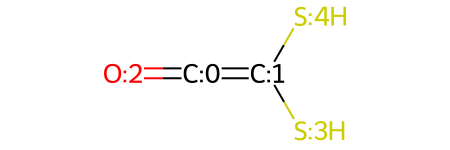

In [14]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol
show_atom_number(dm, 'molAtomMapNumber')

In [6]:
MolTo3DView(equi_mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

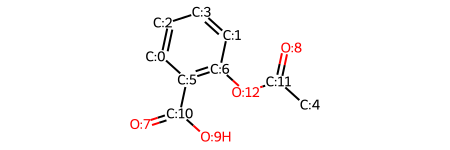

In [7]:
# show 2D molecule
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol
show_atom_number(equi_mol, 'molAtomMapNumber')

In [8]:
from rdkit.Chem import rdMolTransforms
import copy

def SetDihedral(conf, atom_idx, new_vale):
    rdMolTransforms.SetDihedralDeg(conf, atom_idx[0], atom_idx[1], atom_idx[2], atom_idx[3], new_vale)


def GetDihedral(conf, atom_idx):
    return rdMolTransforms.GetDihedralDeg(conf, atom_idx[0], atom_idx[1], atom_idx[2], atom_idx[3])

def GetBondLength(conf, atom_idx):
    return rdMolTransforms.GetBondLength(conf, atom_idx[0], atom_idx[1])

def SetBondLength(conf, atom_idx, new_vale):
    return rdMolTransforms.SetBondLength(conf, atom_idx[0], atom_idx[1], new_vale)

def GetAngle(conf, atom_idx):
    return rdMolTransforms.GetAngleDeg(conf, atom_idx[0], atom_idx[1], atom_idx[2])

def SetAngle(conf, atom_idx, new_vale):
    return rdMolTransforms.SetAngleDeg(conf, atom_idx[0], atom_idx[1], atom_idx[2], new_vale)


def apply_changes(mol, values, rotable_bonds):
    opt_mol = copy.deepcopy(mol)
    #     opt_mol = add_rdkit_conformer(opt_mol)

    # apply rotations
    [SetDihedral(opt_mol.GetConformer(), rotable_bonds[r], values[r]) for r in range(len(rotable_bonds))]

    #     # apply transformation matrix
    #     rdMolTransforms.TransformConformer(opt_mol.GetConformer(), GetTransformationMatrix(values[:6]))

    return opt_mol

def apply_changes_bond_length(mol, values, bond_idx):
    opt_mol = copy.deepcopy(mol)
    [SetBondLength(opt_mol.GetConformer(), bond_idx[r], values[r]) for r in range(len(bond_idx))]
    return opt_mol

def apply_changes_angle(mol, values, bond_idx):
    opt_mol = copy.deepcopy(mol)
    [SetAngle(opt_mol.GetConformer(), bond_idx[r], values[r]) for r in range(len(bond_idx))]

    return opt_mol

In [9]:
MolTo3DView(equi_mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
# org_dangle = GetDihedral(mol.GetConformer(), [6, 12, 11, 4])
# print(org_dangle)
# new_mol = apply_changes(mol, [org_dangle - 60], [[6, 12, 11, 4]])
# viewer = MolTo3DView(new_mol, size=(600, 300), style='stick')
mol = copy.copy(equi_mol)
org_angle = GetAngle(mol.GetConformer(), [5, 10, 9])
print(org_angle)
new_mol = apply_changes_angle(mol, [180], [[5, 10, 9]])
org_angle = GetAngle(new_mol.GetConformer(), [5, 10, 9])
print(org_angle)
new_mol2 = apply_changes_angle(new_mol, [org_angle + 60], [[5, 10, 9]])
viewer = MolTo3DView(new_mol2, size=(600, 300), style='stick')
viewer.show()

120.00408829608305
180.0


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
org_dangle = GetDihedral(mol.GetConformer(), [4, 11, 12, 6])
print(org_dangle)
new_mol = apply_changes(mol, [org_dangle - 60], [[4, 11, 12, 6]])
viewer = MolTo3DView(new_mol, size=(600, 300), style='stick')
viewer.show()

-174.79257866084222


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
# bond length(5, 10)
# bond angle(7, 19, 9)
# dihedral angle(6, 12, 11, 4)
# change bond length (5, 10)
mol = copy.copy(equi_mol)
org_blen = GetBondLength(mol.GetConformer(), [5, 10])
print(org_blen)
mol = apply_changes_bond_length(mol, [2.0], [[5, 10]])
org_angle = GetAngle(mol.GetConformer(), [7, 10, 9])
print(org_angle)
mol = apply_changes_angle(mol, [80], [[7, 10, 9]])
# viewer = MolTo3DView(new_mol, size=(600, 300), style='stick')
# viewer.show()

# get dihedral angle
# rotable_bonds = get_torsions([mol])
# print(rotable_bonds)
org_dangle = GetDihedral(mol.GetConformer(), [6, 12, 11, 4])
print(org_dangle)
new_mol = apply_changes(mol, [10], [[6, 12, 11, 4]])
viewer = MolTo3DView(new_mol, size=(600, 300), style='stick')
viewer.show()

1.4745596264622005
119.99995541725843
-174.79257866084222


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [30]:
MolTo3DView(new_mol_lst[8])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [21]:
import random

# add bond, angle, torsion angle(rotateble or not) noise



def add_equi_noise(opt_mol, bond_var=0.04, angle_var=0.04, torsion_var=2):
    # bond noise, find all bond add noise
    mol = copy.deepcopy(opt_mol)
    conf = mol.GetConformer()
    bond_label_lst = [] # [i, j, delta_len]
    for bond in mol.GetBonds():
        i_idx = bond.GetBeginAtomIdx()
        j_idx = bond.GetEndAtomIdx()
        if mol.GetAtomWithIdx(i_idx).IsInRing() and mol.GetAtomWithIdx(j_idx).IsInRing():
            continue

        org_bond_len = GetBondLength(conf, [i_idx, j_idx])
        # add gaussian noise:
        noise_bond_len = np.random.normal(loc=org_bond_len, scale=bond_var)
        # set bond_length
        SetBondLength(conf, [i_idx, j_idx], noise_bond_len)
        bond_label_lst.append([i_idx, j_idx, noise_bond_len - org_bond_len])

    # angle noise
    angle_label_lst = [] # [i, j, k, delta_angle]
    for atom in mol.GetAtoms(): # j
        j_idx = atom.GetIdx()
        # atom_symbol = atom.GetSymbol()
        atom_degree = atom.GetDegree()
        if atom_degree >= 2:
            # get neighbors
            neighbors = atom.GetNeighbors()
            neb_lst = []
            for neb in neighbors:
                neb_lst.append(neb.GetIdx())
            # random pick one as i
            i_idx = random.choice(neb_lst)
            neb_lst.remove(i_idx)
            # iterate k
            for k_idx in neb_lst:
                # judge (i, j) and (j, k) in ring:
                if mol.GetAtomWithIdx(i_idx).IsInRing() and mol.GetAtomWithIdx(j_idx).IsInRing() and mol.GetAtomWithIdx(k_idx).IsInRing():
                    continue
                # add angle noise to (i, j, k)
                org_angle = GetAngle(conf, [i_idx, j_idx, k_idx])
                # add noise
                noise_angle = np.random.normal(loc=org_angle, scale=angle_var)
                SetAngle(conf, [i_idx, j_idx, k_idx], noise_angle)
                angle_label_lst.append([i_idx, j_idx, k_idx, noise_angle - org_angle])
    
    # dihedral angle(rotatable or not) [i, j, k, l]
    # get the all the rotatable angel idx
    rotable_bonds = get_torsions([mol]) # format like [(0, 5, 10, 7), (1, 6, 12, 11), (6, 12, 11, 4)]
    
    rotable_sets = set([])
    for rb in rotable_bonds:
        rotable_sets.add(f'{rb[1]}_{rb[2]}')
        rotable_sets.add(f'{rb[2]}_{rb[1]}')

    dihedral_label_lst = [] # [i, j, k, l, delta_angle]
    for bond in mol.GetBonds():
        j_idx = bond.GetBeginAtomIdx()
        k_idx = bond.GetEndAtomIdx()
        # check (j_idx, k_idx) in ring or not
        if mol.GetAtomWithIdx(j_idx).IsInRing() and mol.GetAtomWithIdx(k_idx).IsInRing():
            continue
        
        j_atom = mol.GetAtomWithIdx(j_idx)
        j_atom_degree = j_atom.GetDegree()
        k_atom = mol.GetAtomWithIdx(k_idx)
        k_atom_degree = k_atom.GetDegree()

        if j_atom_degree < 2 or k_atom_degree < 2: # cannot compose a dihedral angle
            continue

        # get neibors
        j_neighbors = j_atom.GetNeighbors()
        j_neb_lst = []
        for neb in j_neighbors:
            j_neb_lst.append(neb.GetIdx())
        j_neb_lst.remove(k_idx)

        k_neighbors = k_atom.GetNeighbors()
        k_neb_lst = []
        for neb in k_neighbors:
            k_neb_lst.append(neb.GetIdx())
        k_neb_lst.remove(j_idx)

        # random pick one neighbor from j and k, taken as i, l
        i_idx = random.choice(j_neb_lst)
        l_idx = random.choice(k_neb_lst)

        if f'{j_idx}_{k_idx}' in rotable_sets: # rotatable
            deh_var = torsion_var
        else:
            deh_var = angle_var
        
        # add noise
        org_deh_angle = GetDihedral(conf, [i_idx, j_idx, k_idx, l_idx])
        noise_deh_angle = np.random.normal(loc=org_deh_angle, scale=deh_var)
        SetDihedral(conf, [i_idx, j_idx, k_idx, l_idx], noise_deh_angle)
        dihedral_label_lst.append([i_idx, j_idx, k_idx, l_idx, noise_deh_angle - org_deh_angle])
    
    return mol, bond_label_lst, angle_label_lst, dihedral_label_lst

new_mol, bond_label_lst, angle_label_lst, dihedral_label_lst = add_equi_noise(equi_mol, bond_var=0.04, angle_var=50, torsion_var=2)
print(bond_label_lst)
print(angle_label_lst)
print(dihedral_label_lst)
viewer = MolTo3DView(new_mol, size=(600, 300), style='stick')
viewer.show()

[[0, 14, 0.060637992408250296], [1, 15, -0.06674804961968972], [2, 16, -0.05568250608124159], [3, 17, -0.08281863753943874], [4, 11, 0.03609560668948797], [4, 18, -0.04677117116015128], [4, 19, 0.02258572591856156], [4, 20, 0.010255347797008874], [5, 10, -0.06047734827534512], [6, 12, -0.12469168041257395], [7, 10, 0.014837701560365568], [8, 11, -0.008191356072362765], [9, 10, -0.053205530728561934], [9, 13, -0.005032449838291431], [11, 12, -0.0011981832321443786]]
[[14, 0, 2, -19.595058510964137], [14, 0, 5, 35.61016537789115], [6, 1, 15, -30.741020694578197], [16, 2, 0, -43.25270326086684], [16, 2, 3, -54.59926634699502], [2, 3, 17, -55.2898651684329], [20, 4, 11, 22.935055350687307], [20, 4, 18, 62.832362383994024], [20, 4, 19, -67.43479472574182], [10, 5, 0, -44.02387448343379], [10, 5, 6, -44.30036125811495], [5, 6, 12, 36.18571656940401], [10, 9, 13, 89.52442874449788], [5, 10, 7, 23.667614652521507], [5, 10, 9, -61.09502572963979], [4, 11, 8, -0.5927126381321273], [4, 11, 12, 7.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
viewer = MolTo3DView(equi_mol, size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [32]:
MolTo3DView(asp_4w[217])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [20]:
from rdkit.Chem import AllChem

idxs = []
energy = []

c_energy = []
rdkit_force = []
for i in range(show_num):
    idxs.append(i)
    energy.append(md17_data[i].y[0][0].item())

    mol3d = copy.copy(asp_4w[i])
    props = AllChem.MMFFGetMoleculeProperties(mol3d)
    ff2 = AllChem.MMFFGetMoleculeForceField(mol3d, props)
    c_energy.append(ff2.CalcEnergy())
    rdkit_force.append(ff2.CalcGrad())



import altair as alt
import copy
import pandas as pd

dfrdkit = pd.DataFrame({'idx':idxs, 'energy':energy})
alt.Chart(dfrdkit).mark_line(point=True,interpolate="natural").encode(
    alt.X('idx:Q',
        scale=alt.Scale(domain=[0,100,1])
    ),
    alt.Y('energy:Q',
        scale=alt.Scale(zero=False)
    )
).interactive()

/opt/conda/lib/python3.8/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [22]:
md17_data[0].dy

tensor([[-1.0413e+00, -2.6159e+00, -1.5052e+00],
        [-2.8130e+00, -1.4064e+01, -2.2379e+00],
        [ 1.4236e+01,  3.8096e+00,  5.2474e+00],
        [ 3.7151e+00, -8.3912e+00, -1.4575e+00],
        [ 1.1014e+01,  9.0846e+00, -1.9056e+01],
        [ 1.5297e+01, -1.5275e+01,  5.7165e+00],
        [ 1.7196e+01, -1.1872e+00,  1.0080e+01],
        [-1.8811e+01, -1.2700e+01, -2.0666e+00],
        [ 7.7378e+00,  5.0807e+00,  2.9817e+01],
        [ 5.1367e+01, -7.2760e+00,  1.4718e+01],
        [-4.4232e+01, -7.0855e+00, -1.0481e+01],
        [-1.6328e+01, -1.0512e+00,  3.1521e+01],
        [-2.2730e+01,  1.0032e+01, -4.4809e+01],
        [-1.1735e+01,  2.0352e+01, -6.4792e+00],
        [ 2.5087e+00, -4.2573e+00,  1.3203e+00],
        [-1.2851e+01,  1.6405e+01, -4.1045e+00],
        [ 2.3604e+00, -3.8143e-02,  3.7311e-01],
        [ 8.2120e+00,  1.7902e+01,  9.2951e-01],
        [ 7.2594e-01, -3.8242e+00, -3.9609e-01],
        [ 2.2780e+00, -2.3515e+00,  4.8480e+00],
        [-6.1061e+00

In [24]:
np.array(rdkit_force[0]).reshape(-1, 3)

array([[  8.19088934,   9.92007637,   1.70288536],
       [  8.87780142,  -2.2560667 ,   6.05346119],
       [ -6.59288683,  -4.24741345,  -1.16628467],
       [ -4.73451139,  -3.30310791,  -0.53606922],
       [-19.69991435,   4.93998505,  18.92680485],
       [-12.58898282,   8.05622771,  -2.93847296],
       [-32.55924305,   8.46267073, -18.97575053],
       [ 16.7425845 ,  20.66184906,   3.80065504],
       [ -1.89724286,  -8.10188788, -54.47544205],
       [-37.5742401 , -25.97690048,  -6.03872509],
       [ 14.17617508,   9.84643479,   1.86637813],
       [ 10.87443738,  -4.5340403 , -17.52329616],
       [ 43.75092091,  -4.3934568 ,  65.81470231],
       [ 20.09265585,   0.37563398,   5.02302343],
       [ -3.58346971,   4.01872144,  -2.0213477 ],
       [  2.65758266,  -4.37367354,   0.90054394],
       [ -5.78407424,  -0.64999598,  -1.56709107],
       [ -2.76629848,  -5.30530905,  -0.29290149],
       [ -0.40032866,   1.8826125 ,   0.06686091],
       [  1.74108573,  -2.70625

In [21]:
dfrdkit = pd.DataFrame({'idx':idxs, 'energy_rdkit':c_energy})
alt.Chart(dfrdkit).mark_line(point=True,interpolate="natural").encode(
    alt.X('idx:Q',
        scale=alt.Scale(domain=[0,100,1])
    ),
    alt.Y('energy_rdkit:Q',
        scale=alt.Scale(zero=False)
    )
).interactive()

alt.Chart(...)

In [9]:
def get_torsions(mol_list):
    atom_counter = 0
    torsionList = []
    dihedralList = []
    for m in mol_list:
        torsionSmarts = '[!$(*#*)&!D1]-&!@[!$(*#*)&!D1]'
        torsionQuery = Chem.MolFromSmarts(torsionSmarts)
        matches = m.GetSubstructMatches(torsionQuery)
        conf = m.GetConformer()
        for match in matches:
            idx2 = match[0]
            idx3 = match[1]
            bond = m.GetBondBetweenAtoms(idx2, idx3)
            jAtom = m.GetAtomWithIdx(idx2)
            kAtom = m.GetAtomWithIdx(idx3)
            for b1 in jAtom.GetBonds():
                if (b1.GetIdx() == bond.GetIdx()):
                    continue
                idx1 = b1.GetOtherAtomIdx(idx2)
                for b2 in kAtom.GetBonds():
                    if ((b2.GetIdx() == bond.GetIdx())
                            or (b2.GetIdx() == b1.GetIdx())):
                        continue
                    idx4 = b2.GetOtherAtomIdx(idx3)
                    # skip 3-membered rings
                    if (idx4 == idx1):
                        continue
                    # skip torsions that include hydrogens
                    #                     if ((m.GetAtomWithIdx(idx1).GetAtomicNum() == 1)
                    #                         or (m.GetAtomWithIdx(idx4).GetAtomicNum() == 1)):
                    #                         continue
                    if m.GetAtomWithIdx(idx4).IsInRing():
                        torsionList.append(
                            (idx4 + atom_counter, idx3 + atom_counter, idx2 + atom_counter, idx1 + atom_counter))
                        break
                    else:
                        torsionList.append(
                            (idx1 + atom_counter, idx2 + atom_counter, idx3 + atom_counter, idx4 + atom_counter))
                        break
                break

        atom_counter += m.GetNumAtoms()
    return torsionList


[(0, 5, 10, 7), (1, 6, 12, 11), (6, 12, 11, 4)]


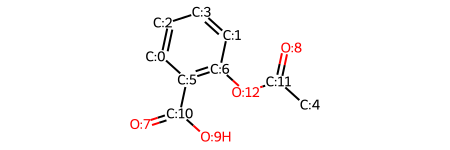

In [14]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
mol = asp_4w[0]
noh_mol = Chem.RemoveHs(mol)
rotable_bonds = get_torsions([noh_mol])
print(rotable_bonds)
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol
show_atom_number(mol, 'molAtomMapNumber')

In [37]:
npy_file = '/share/project/sharefs-skfeng/xyz2mol/aspirin.npy'
import numpy as np
asp_mols = np.load(npy_file,allow_pickle=True)

In [15]:
from rdkit.Chem import rdMolTransforms
from tqdm import tqdm
from torsion_utils import apply_changes
def GetDihedral(conf, atom_idx):
    return rdMolTransforms.GetDihedralDeg(conf, atom_idx[0], atom_idx[1], atom_idx[2], atom_idx[3])

ang_lst = []

for mol in tqdm(asp_mols):
    if mol is None:
        print('None happens')
        continue
    org_angle = []
    for rot_bond in rotable_bonds:
        org_angle.append(GetDihedral(mol.GetConformer(), rot_bond))
    new_mol = apply_changes(mol, org_angle, rotable_bonds)
    ang_lst.append(org_angle)

 23%|██▎       | 48439/211762 [00:01<00:04, 37139.97it/s]

None happens


 43%|████▎     | 90722/211762 [00:02<00:03, 36525.58it/s]


ValueError: atoms j and k must be bonded

In [ ]:
ang_lst = np.array(ang_lst)

In [ ]:
import matplotlib.pyplot as plt 
x = ang_lst[:,0]
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=bins)

In [ ]:
x = ang_lst[:,1]
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=bins)

In [ ]:
x = ang_lst[:,2]
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=bins)

In [ ]:
ang_lst[:,2][29]

In [ ]:
ang_lst[:,2][30]

In [ ]:
GetDihedral(asp_4w[100].GetConformer(), rotable_bonds[-1])

In [ ]:
i = 5; j = 10
dist_array = []
for mol in tqdm(asp_mols):
    if mol is None:
        print('None happens')
        continue
    pos = mol.GetConformer().GetPositions()
    # ang_lst.append(org_angle)
    dis = np.sqrt(((pos[i] - pos[j])**2).sum())
    dist_array.append(dis)
dist_array = np.array(dist_array)

In [ ]:
q25, q75 = np.percentile(dist_array, [25, 75])
bin_width = 2 * (q75 - q25) * len(dist_array) ** (-1/3)
bins = round((dist_array.max() - dist_array.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(dist_array, bins=bins)
# dist_array

In [ ]:
dist_array.shape

In [ ]:
energy_y_lst = []
for md_ele in tqdm(md17_data):
    energy_y_lst.append(md_ele.y[0][0].item())

In [ ]:
energy_y_lst = np.array(energy_y_lst)


In [ ]:
q25, q75 = np.percentile(energy_y_lst, [25, 75])
bin_width = 2 * (q75 - q25) * len(energy_y_lst) ** (-1/3)
bins = round((energy_y_lst.max() - energy_y_lst.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(energy_y_lst, bins=bins)

In [7]:
from tqdm import tqdm
point_pos = []
for mol in tqdm(asp_mols):
    if mol is None:
        print('None happens')
        continue
    pos = mol.GetConformer().GetPositions()
    point_pos.append(pos[0])
point_pos = np.array(point_pos)

 36%|███▋      | 77213/211762 [00:00<00:00, 259596.05it/s]

None happens


100%|██████████| 211762/211762 [00:00<00:00, 282069.30it/s]


In [ ]:
point_pos

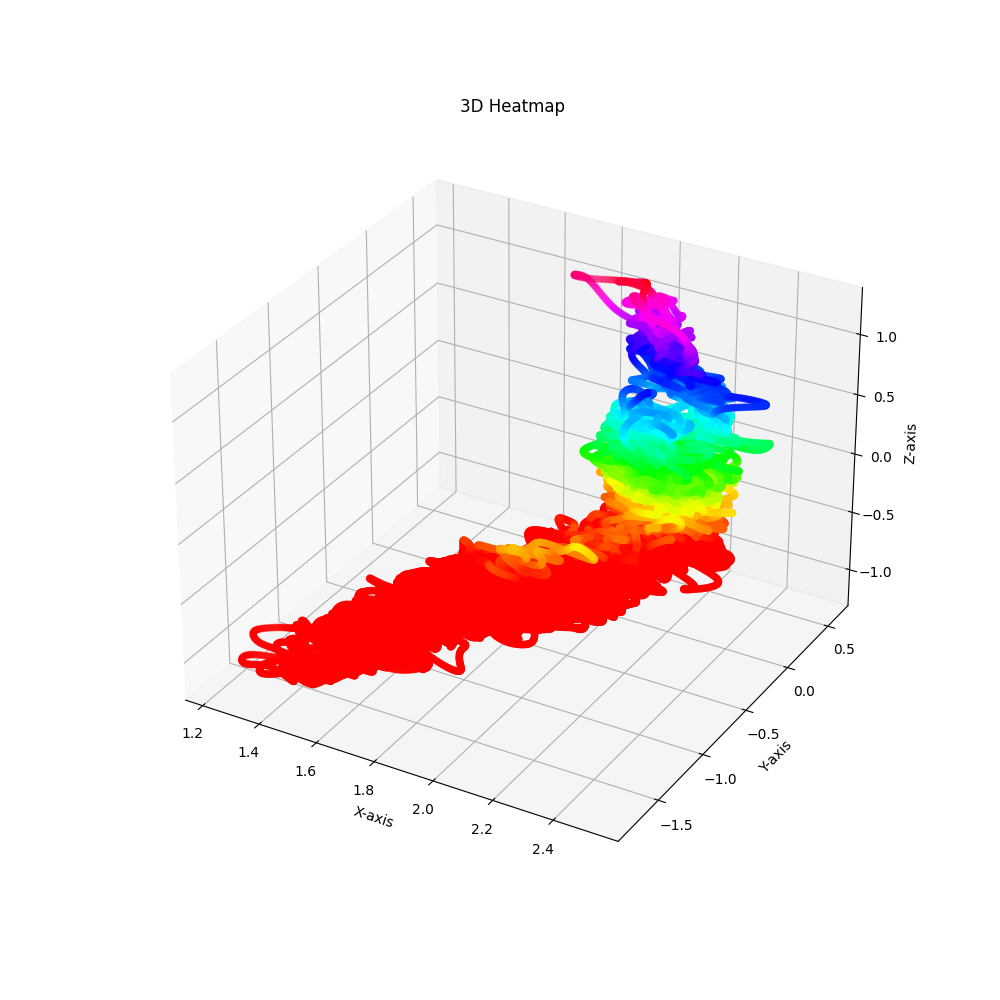

In [8]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

  
# creating a dummy dataset
# x = np.random.randint(low=100, high=500, size=(1000,))
# y = np.random.randint(low=300, high=500, size=(1000,))
# z = np.random.randint(low=200, high=500, size=(1000,))
x, y, z = point_pos[:, 0], point_pos[:, 1], point_pos[:, 2]
# colo = [x + y + z]
  
# creating figures
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
  
# setting color bar
# color_map = matplotlib.cm.ScalarMappable(cmap=matplotlib.cm.hsv)
# color_map.set_array(colo)
  
# creating the heatmap
img = ax.scatter(x, y, z,
                c=cm.hsv(z/max(z)), marker='o')
# plt.colorbar(color_map)

  
# adding title and labels
ax.set_title("3D Heatmap")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
  
# displaying plot
plt.show()

Freedman–Diaconis number of bins: 122


(array([  23.,   63.,   51.,   35.,   40.,   31.,  125.,  129.,  192.,
         231.,  300.,  266.,  288.,  417.,  641.,  855., 1254., 1351.,
        1940., 2046., 2348., 3212., 3538., 3766., 4017., 4455., 4758.,
        5485., 5245., 5050., 5127., 4829., 5099., 4969., 4486., 4876.,
        4819., 4933., 4453., 4092., 4067., 3813., 4155., 3896., 3447.,
        3636., 3532., 3313., 2926., 2684., 2237., 2195., 2219., 2527.,
        2480., 2109., 2342., 2544., 2651., 2632., 2746., 2972., 2948.,
        2525., 2213., 2287., 1890., 1892., 2177., 2156., 2146., 1738.,
        2128., 2261., 1774., 1241., 1387., 1018.,  746.,  797.,  746.,
         776.,  517.,  556.,  590.,  453.,  322.,  429.,  362.,  301.,
         381.,  403.,  389.,  435.,  415.,  491.,  485.,  617.,  540.,
         406.,  397.,  359.,  226.,  268.,  280.,  180.,  172.,  221.,
         299.,  223.,  181.,  127.,  119.,   85.,   79.,  176.,  202.,
         104.,   38.,   14.,   90.,   25.]),
 array([-2.99484968, -2.96888552

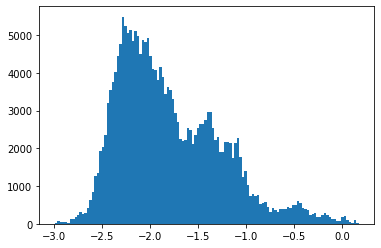

In [5]:
import matplotlib.pyplot as plt

x, y, z = point_pos[:, 0], point_pos[:, 1], point_pos[:, 2]

q25, q75 = np.percentile(y, [25, 75])
bin_width = 2 * (q75 - q25) * len(y) ** (-1/3)
bins = round((y.max() - y.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(y, bins=bins)

In [25]:
type(mol3d)

rdkit.Chem.rdchem.Mol

In [4]:
from sgdml.predict import GDMLPredict
model = np.load('/home/fengshikun/Backup/Denoising/data/md17/aspirin/raw/aspirin-aims.PBE.TS.light.tier.1-train200-sym6.npz')

In [5]:
gdml = GDMLPredict(model)


In [6]:
e, f = gdml.predict(md17_data[1].pos.reshape(1, -1))

In [7]:
e

array([-406756.74470124])

In [8]:
md17_data[1].y

tensor([[-406757.0312]])

In [43]:
f.reshape(-1, 3)

array([[-2.17240696e+00,  2.03870736e-01, -2.13507174e+00],
       [-5.97526106e+00,  3.15413758e+00, -4.64212112e+00],
       [ 1.09100137e+01,  2.54579251e+00,  2.88184774e+00],
       [ 4.86241566e+00,  3.04529312e+00, -1.46568415e-01],
       [ 1.16337789e+01,  6.25983698e+00, -2.19578817e+01],
       [ 1.70589458e+01, -2.00135695e+01,  6.11231554e+00],
       [ 1.79760122e+01, -2.06993786e+00,  1.05646590e+01],
       [-2.19260093e+01, -1.24253686e+01, -4.07642392e+00],
       [ 6.16435842e+00,  4.09802713e+00,  2.39022006e+01],
       [ 5.35077736e+01,  1.14538725e+01,  1.29585668e+01],
       [-3.49070552e+01, -8.16572281e+00, -7.85744131e+00],
       [-1.69014926e+01,  2.51082597e+00,  3.74010603e+01],
       [-2.56684693e+01,  8.12209700e+00, -4.67934172e+01],
       [-1.91980609e+01,  2.83604127e+00, -5.66206498e+00],
       [ 2.31585146e+00, -8.48522964e+00,  1.91183026e+00],
       [-7.18520463e+00,  5.38943384e+00, -1.30206548e+00],
       [ 9.41682857e+00,  5.94423284e-01

In [49]:
md17_data[1].dy.reshape(-1, 3)

tensor([[-1.0413e+00, -2.6159e+00, -1.5052e+00],
        [-2.8130e+00, -1.4064e+01, -2.2379e+00],
        [ 1.4236e+01,  3.8096e+00,  5.2474e+00],
        [ 3.7151e+00, -8.3912e+00, -1.4575e+00],
        [ 1.1014e+01,  9.0846e+00, -1.9056e+01],
        [ 1.5297e+01, -1.5275e+01,  5.7165e+00],
        [ 1.7196e+01, -1.1872e+00,  1.0080e+01],
        [-1.8811e+01, -1.2700e+01, -2.0666e+00],
        [ 7.7378e+00,  5.0807e+00,  2.9817e+01],
        [ 5.1367e+01, -7.2760e+00,  1.4718e+01],
        [-4.4232e+01, -7.0855e+00, -1.0481e+01],
        [-1.6328e+01, -1.0512e+00,  3.1521e+01],
        [-2.2730e+01,  1.0032e+01, -4.4809e+01],
        [-1.1735e+01,  2.0352e+01, -6.4792e+00],
        [ 2.5087e+00, -4.2573e+00,  1.3203e+00],
        [-1.2851e+01,  1.6405e+01, -4.1045e+00],
        [ 2.3604e+00, -3.8143e-02,  3.7311e-01],
        [ 8.2120e+00,  1.7902e+01,  9.2951e-01],
        [ 7.2594e-01, -3.8242e+00, -3.9609e-01],
        [ 2.2780e+00, -2.3515e+00,  4.8480e+00],
        [-6.1061e+00

In [ ]:
from tqdm import tqdm

failed_mols= []
for mol in tqdm(asp_mols):
    try:
        no_h_mol = Chem.RemoveHs(mol)
    except:
        # print('Remove H faild')
        failed_mols.append(mol)
print(len(failed_mols))

In [38]:
# fix md17 mol lst
s_mol = asp_mols[0]
no_h_mol = Chem.RemoveHs(s_mol)


In [39]:
asp_mols[-100].GetConformer().GetPositions()

array([[ 1.9220866 , -1.23164785, -0.53421217],
       [ 0.60204476,  1.00541461, -1.73423243],
       [ 2.60039043, -0.38870025, -1.41384017],
       [ 1.91340399,  0.61960077, -2.14083099],
       [-2.43564296,  2.27708125,  0.76708078],
       [ 0.54137409, -0.97951162, -0.15614989],
       [ 0.01727038,  0.19770131, -0.70761019],
       [-0.41998103, -1.08314586,  2.02657771],
       [-0.06181354,  1.93503237,  1.13430429],
       [-1.01994359, -2.75733304,  0.65712833],
       [-0.32837853, -1.68891227,  0.94162655],
       [-1.08725977,  1.58623981,  0.61817932],
       [-1.22196913,  0.57363969, -0.36365315],
       [-1.52167988, -3.02075624,  1.47145391],
       [ 2.5835247 , -2.08123493, -0.08759245],
       [ 0.09881516,  1.79895067, -2.27805018],
       [ 3.61669326, -0.61072958, -1.86672032],
       [ 2.36654806,  1.18911982, -2.92484999],
       [-2.73066235,  2.63079906,  1.91151202],
       [-2.55303073,  3.13132668,  0.19560584],
       [-3.25216103,  1.45782328,  0.700

In [40]:
data_npz["R"][-100]

array([[ 1.92208664, -1.23164784, -0.53421217],
       [ 0.60204478,  1.00541464, -1.73423246],
       [ 2.60039052, -0.38870024, -1.41384016],
       [ 1.91340401,  0.61960077, -2.1408311 ],
       [-2.4356429 ,  2.27708118,  0.76708078],
       [ 0.54137408, -0.97951164, -0.15614989],
       [ 0.01727038,  0.19770131, -0.70761017],
       [-0.41998102, -1.08314582,  2.02657771],
       [-0.06181354,  1.93503237,  1.13430423],
       [-1.01994358, -2.75733296,  0.65712833],
       [-0.32837852, -1.68891231,  0.94162656],
       [-1.08725982,  1.5862398 ,  0.61817934],
       [-1.22196914,  0.5736397 , -0.36365315],
       [-1.52167989, -3.0207563 ,  1.47145389],
       [ 2.5835246 , -2.08123486, -0.08759245],
       [ 0.09881516,  1.7989507 , -2.27805018],
       [ 3.61669336, -0.61072956, -1.86672027],
       [ 2.36654798,  1.18911985, -2.92485003],
       [-2.73066228,  2.63079894,  1.91151206],
       [-2.55303067,  3.13132678,  0.19560585],
       [-3.25216111,  1.45782326,  0.700

In [41]:
new_asp_lst = []
import copy
data_length = data_npz["R"].shape[0]
print(data_length)

211762


In [42]:
import multiprocessing
from rdkit.Geometry import Point3D

pool = multiprocessing.Pool(64)

def process_item():
    for idx, mol in enumerate(data_npz["R"]):
        yield data_npz["R"][idx]

def set_coordinate(org_pos):
    new_mol = copy.copy(s_mol)
    conf = new_mol.GetConformer()
    for j in range(mol.GetNumAtoms()):
        x, y , z = org_pos[j][0], org_pos[j][1], org_pos[j][2]
        conf.SetAtomPosition(j, Point3D(float(x), float(y), float(z)))
    return new_mol
    

for new_mol in tqdm(pool.imap(set_coordinate, process_item(), chunksize=5), total=data_length):
    new_asp_lst.append(new_mol)
    

  0%|          | 0/211762 [03:31<?, ?it/s]


KeyboardInterrupt: 

In [48]:
md17_data[100]['pos']

tensor([[ 2.2378, -0.3834,  0.1277],
        [ 0.8537,  1.9481, -0.4274],
        [ 2.8968,  0.8563,  0.1709],
        [ 2.1746,  2.0938, -0.0421],
        [-3.3884,  0.8100, -0.3855],
        [ 0.8707, -0.5382, -0.2186],
        [ 0.2141,  0.6876, -0.4639],
        [-1.0073, -2.0181, -0.1011],
        [-1.8561,  0.5622,  1.4943],
        [ 1.0547, -2.8771,  0.1503],
        [ 0.1450, -1.7277,  0.0393],
        [-2.0496,  0.6839,  0.2898],
        [-1.0883,  0.7322, -0.7509],
        [ 0.5120, -3.6167, -0.3289],
        [ 2.8132, -1.1960,  0.5608],
        [ 0.0941,  2.7059, -0.8397],
        [ 3.8738,  0.7776,  0.6062],
        [ 2.7172,  3.0927, -0.1220],
        [-4.0693,  0.2890,  0.2998],
        [-3.6503,  1.9045, -0.4776],
        [-3.4259,  0.4132, -1.4372]])

In [49]:
data_npz['R'][100]

array([[ 2.23778343, -0.38341807,  0.12767691],
       [ 0.85369385,  1.9480858 , -0.42737899],
       [ 2.89675874,  0.85627716,  0.17094603],
       [ 2.1746485 ,  2.09377419, -0.04211428],
       [-3.38844105,  0.81000362, -0.38554274],
       [ 0.87066847, -0.5381806 , -0.2185969 ],
       [ 0.2141132 ,  0.68764522, -0.46389277],
       [-1.00734314, -2.01806585, -0.10108386],
       [-1.85610901,  0.56215152,  1.49425496],
       [ 1.05471202, -2.8771333 ,  0.15028903],
       [ 0.14496261, -1.72772855,  0.03929411],
       [-2.04959411,  0.68390521,  0.28977304],
       [-1.08826232,  0.73218478, -0.75093242],
       [ 0.51203017, -3.61671092, -0.32888502],
       [ 2.81323288, -1.19597385,  0.56076179],
       [ 0.09406422,  2.70587096, -0.83965131],
       [ 3.87375285,  0.77755451,  0.60622655],
       [ 2.71722953,  3.09270563, -0.12204273],
       [-4.06927975,  0.28902994,  0.29983549],
       [-3.6503491 ,  1.90448128, -0.4776312 ],
       [-3.42594655,  0.4132374 , -1.437

In [51]:
asp_mols_new = np.load('new_asp_lst.npy', allow_pickle=True)


In [53]:
asp_mols_new[100].GetConformer().GetPositions()

array([[ 2.23778343, -0.38341808,  0.1276769 ],
       [ 0.85369384,  1.94808578, -0.42737898],
       [ 2.89675879,  0.85627717,  0.17094603],
       [ 2.17464852,  2.09377408, -0.04211428],
       [-3.38844109,  0.81000364, -0.38554275],
       [ 0.87066847, -0.53818059, -0.21859691],
       [ 0.21411321,  0.6876452 , -0.46389276],
       [-1.00734317, -2.01806593, -0.10108386],
       [-1.85610902,  0.56215149,  1.49425495],
       [ 1.05471206, -2.87713337,  0.15028903],
       [ 0.14496261, -1.72772861,  0.03929411],
       [-2.04959416,  0.68390518,  0.28977305],
       [-1.08826232,  0.73218477, -0.7509324 ],
       [ 0.51203018, -3.6167109 , -0.32888502],
       [ 2.8132329 , -1.19597387,  0.56076181],
       [ 0.09406422,  2.70587087, -0.83965129],
       [ 3.87375283,  0.77755451,  0.60622656],
       [ 2.7172296 ,  3.09270573, -0.12204273],
       [-4.06927967,  0.28902993,  0.2998355 ],
       [-3.65034914,  1.90448129, -0.47763121],
       [-3.42594647,  0.41323739, -1.437

In [56]:
import copy
mol = copy.deepcopy(asp_mols_new[0])
show_num = 100
base = 1000
for i in range(show_num):
    i += 1
    idx = base + i
    conf = asp_mols_new[idx].GetConformer()
    conf.SetId(i)
    mol.AddConformer(conf)
    
from ipywidgets import interact, interactive, fixed
import py3Dmol
from rdkit import Chem
def drawit(m,p,confId):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    return p.show()
viewer = py3Dmol.view(width=500, height=500)
mb = Chem.MolToMolBlock(mol,confId=0)
viewer.addModel(mb,'sdf')
viewer.setStyle({'stick':{}})
viewer.zoomTo()
conformerIds=[conf.GetId() for conf in mol.GetConformers()]
interact(drawit, m=fixed(mol),p=fixed(viewer),confId=(0,mol.GetNumConformers()-1))

interactive(children=(IntSlider(value=50, description='confId'), Output()), _dom_classes=('widget-interact',))

<function __main__.drawit(m, p, confId)>

: 